In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [4]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [9]:
cars=cars.replace('?',np.nan)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,NaN


In [10]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
numeric_cars=numeric_cars.astype('float')
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [13]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [14]:
def knn_train_test(train_col, target_col,df):
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    l=int(len(rand_df)/2)
    train_df=rand_df[0:l]
    test_df=rand_df[l:]
    model=KNeighborsRegressor()
    model.fit(train_df[[train_col]],train_df[target_col])
    predicted_values=model.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col], predicted_values)
    rmse = np.sqrt(mse)
    return rmse
rmse_results = {}
train_cols = numeric_cars.columns.tolist()
train_cols.remove('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

curb-weight          3710.213433
width                4331.157013
city-mpg             4424.961635
horsepower           4504.691638
length               4795.547352
wheel-base           4954.943665
highway-mpg          5693.291162
normalized-losses    6215.795116
compression-rate     6600.990165
bore                 7410.505636
stroke               8016.099329
height               8096.062344
peak-rpm             8294.897806
dtype: float64

In [18]:
def multiple_k_knn_train_test(train_col,target_col,df):
    shuffeled_index=np.random.permutation(df.index)
    random_df=df.reindex(shuffeled_index)
    l=int(len(random_df)/2)
    train_df=random_df[0:l]
    test_df=random_df[l:]
    k=[1,3,5,7,9]
    k_cal_values=dict()
    for i in k:
        model=KNeighborsRegressor(n_neighbors=i)
        model.fit(train_df[[train_col]],train_df[target_col])
        predicted_values=model.predict(test_df[[train_col]])
        mse = mean_squared_error(test_df[target_col], predicted_values)
        rmse = np.sqrt(mse)
        k_cal_values[i]=rmse
    return k_cal_values
k_rmse_results = {}
train_cols = numeric_cars.columns.tolist()
train_cols.remove('price')
for col in train_cols:
    rmse_val = multiple_k_knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val
k_rmse_results

{'bore': {1: 8208.1977737545603,
  3: 7611.6020310147487,
  5: 7868.7710933791932,
  7: 7767.0031856928535,
  9: 7660.6205473683076},
 'city-mpg': {1: 6170.0099796122577,
  3: 4843.4522323393148,
  5: 4434.3490790030783,
  7: 4276.3382480434275,
  9: 4402.8870713166589},
 'compression-rate': {1: 8243.8643154460733,
  3: 6413.4160390020652,
  5: 6252.3837217148111,
  7: 6636.7665888061629,
  9: 6920.7921610119674},
 'curb-weight': {1: 5608.3263418274482,
  3: 4720.6917425365536,
  5: 4439.9280443281823,
  7: 4871.5011345892035,
  9: 5387.770562988776},
 'height': {1: 9049.4799834187725,
  3: 8118.8830446859693,
  5: 7041.896925214578,
  7: 7237.5021740052716,
  9: 7380.4982701082927},
 'highway-mpg': {1: 4427.6426689560658,
  3: 4586.8103462989711,
  5: 5093.6483711297615,
  7: 5278.0768787588249,
  9: 5306.5398432552302},
 'horsepower': {1: 3526.7027317901125,
  3: 3804.786492580814,
  5: 4266.350772412804,
  7: 4559.7848337666701,
  9: 4518.4891021949406},
 'length': {1: 4385.91959265

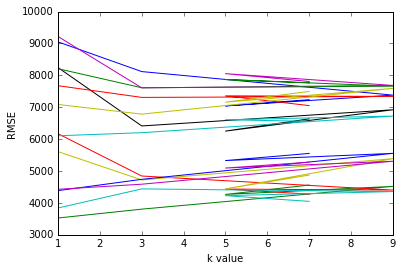

In [22]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [23]:
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4135.222787
width                4182.535649
city-mpg             4825.407322
highway-mpg          4938.543622
curb-weight          5005.643565
length               5111.930452
wheel-base           6439.666511
compression-rate     6893.444565
normalized-losses    7224.114254
stroke               7346.680837
height               7765.652079
bore                 7823.238926
peak-rpm             8074.676903
dtype: float64

In [24]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]    
    k_values = [5]
    k_rmses = {}    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        predicted_labels = knn.predict(test_df[train_cols])
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses
k_rmse_results = {}
two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 3341.6024539726504},
 'four best features': {5: 3280.3807311630976},
 'six best features': {5: 3628.2611882141268},
 'three best features': {5: 3305.9401397969677},
 'two best features': {5: 3589.3132622073304}}

In [25]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_train_row = int(len(rand_df) / 2)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]    
    k_values = [i for i in range(1,25)]
    k_rmses = {}    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        predicted_labels = knn.predict(test_df[train_cols])
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses
k_rmse_results = {}
three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val
four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val
five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val
k_rmse_results

{'five best features': {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.5205429981911,
  7: 3817.2904521188252,
  8: 4004.4145296855731,
  9: 3992.3186041830318,
  10: 4138.7287878533352,
  11: 4342.0528528290979,
  12: 4416.1453810311359,
  13: 4493.8798141857205,
  14: 4463.5016015545707,
  15: 4474.480783207805,
  16: 4553.5595362768345,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.9008939828218,
  20: 4712.0229855431653,
  21: 4755.8566258237734,
  22: 4788.162720030673,
  23: 4806.9233819650544,
  24: 4879.983352195467},
 'four best features': {1: 2516.5892799502258,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.2694826412612,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.9986213622451,
  10: 4042.2472261878988,
  11: 4230.3352486840677,
  12: 4354.0086751540612,
  13: 4461.6266648777882,
  14: 4468.02984

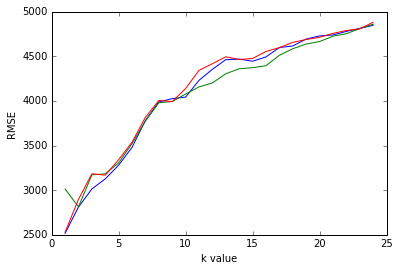

In [26]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')